#Regression Tutorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2021-05-02 12:01:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.3’

auto-mpg.data.3     100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2021-05-02 12:01:40 (226 KB/s) - ‘auto-mpg.data.3’ saved [30286/30286]



In [ ]:
names = 'mpg cyl disp hp weight acc model origin name'
names = names.split(' ')

In [ ]:
df = pd.read_table('auto-mpg.data', delimiter=r"\s+", index_col=False,names=names,na_values=['?'])


In [ ]:
df

,mpg,cyl,disp,hp,weight,acc,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [ ]:
df.tail()

,mpg,cyl,disp,hp,weight,acc,model,origin,name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [ ]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'weight', 'acc', 'model', 'origin', 'name'], dtype='object')

In [ ]:
df.describe()

,mpg,cyl,disp,hp,weight,acc,model,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.isna().sum()

mpg       0
cyl       0
disp      0
hp        6
weight    0
acc       0
model     0
origin    0
name      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.drop(['cyl','disp','hp'], axis = 1)


In [ ]:
df

,mpg,weight,acc,model,origin,name
0,18.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...
393,27.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,2130.0,24.6,82,2,vw pickup
395,32.0,2295.0,11.6,82,1,dodge rampage
396,28.0,2625.0,18.6,82,1,ford ranger


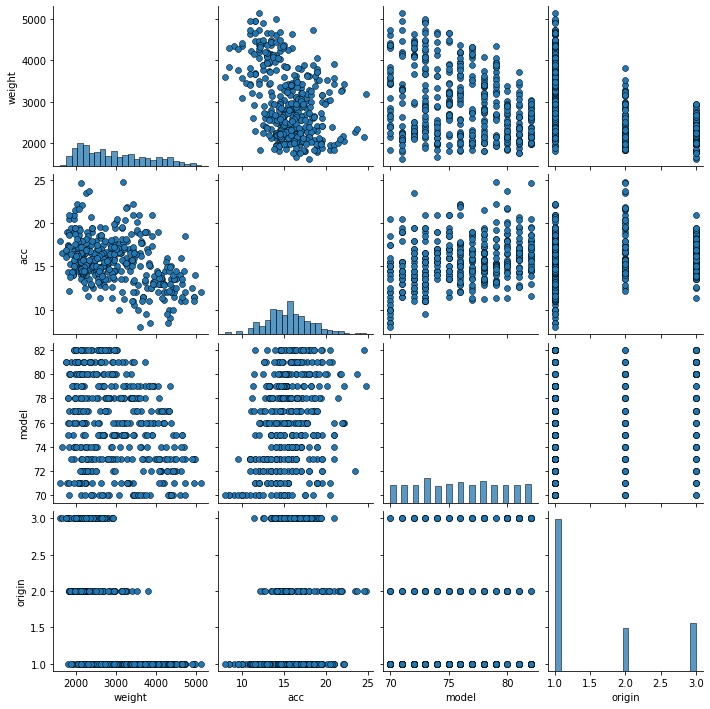

In [ ]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

In [ ]:
X = df.drop(['name'],axis=1)
X

,mpg,weight,acc,model,origin
0,18.0,3504.0,12.0,70,1
1,15.0,3693.0,11.5,70,1
2,18.0,3436.0,11.0,70,1
3,16.0,3433.0,12.0,70,1
4,17.0,3449.0,10.5,70,1
...,...,...,...,...,...
393,27.0,2790.0,15.6,82,1
394,44.0,2130.0,24.6,82,2
395,32.0,2295.0,11.6,82,1
396,28.0,2625.0,18.6,82,1


In [ ]:
Y = df['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64